In [3]:
import glob
import shutil
import cv2 
from PIL import Image
import PIL
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random 
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from keras import regularizers

import warnings
# Ignore waring
warnings.filterwarnings('ignore')


In [4]:
emotion_path = ['/angry/*', '/disgust/*', '/fear/*', '/happy/*', '/sad/*', '/surprise/*', '/neutral/*']


In [5]:
train_path = 'E:/A Study/Year3-2/MachineLearning/lab4/emotions_data/images/train'


In [6]:
X = []
y= []
for i, path in enumerate(emotion_path):
  for name in glob.glob(train_path+path):
    img = cv2.imread(name)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (48,48))
    X.append((img))
    y.append(i)
len(X)


28821

In [7]:
X = np.array(X)
y = np.array(y)

Chia dữ liệu thành train và test

In [8]:
(X_train,X_test,y_train,y_test) = train_test_split(X,y,test_size=0.2,random_state=100)

In [9]:
print( X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(23056, 48, 48) (5765, 48, 48) (23056,) (5765,)


Normalize Input

In [10]:
X_train = X_train /255
X_test_scaled = X_test / 255

Normalize output

In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()
y_test = encoder.transform(y_test.reshape(-1,1)).toarray()

In [12]:
y_train[1]

array([0., 0., 0., 0., 1., 0., 0.])

In [13]:
print(X_train.shape)

(23056, 48, 48)


Build Model

In [14]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
import cv2
from keras import regularizers




In [15]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [22]:
learning_rate = 0.0001  # Tốc độ học ban đầu

# Khởi tạo learning rate scheduler
optimizer1 = tf.keras.optimizers.Adam(learning_rate = 0.0001)

model.compile(optimizer = optimizer1, loss = 'categorical_crossentropy',metrics =['accuracy'])

history = model.fit(X_train, y_train,
          epochs=60,validation_data=(X_test_scaled, y_test),batch_size = 64,shuffle = True)

Epoch 1/60
146/361 [===========>..................] - ETA: 6:34 - loss: 7.8123 - accuracy: 0.2196

KeyboardInterrupt: 

In [51]:
#history = model.fit(X_train,y_train,batch_size =64, epochs =30,validation_data =(X_test,y_test),shuffle=True)

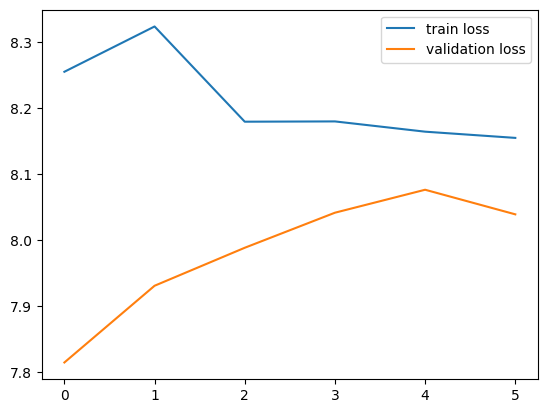

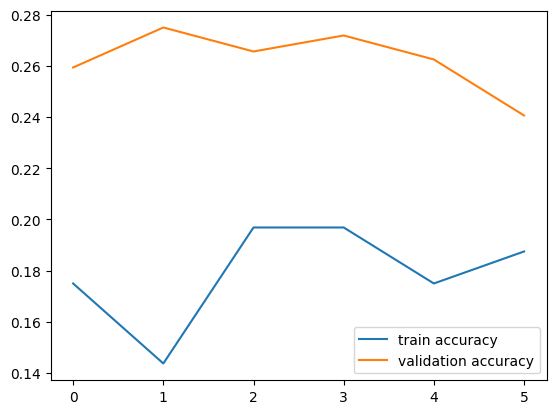

In [18]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [19]:
model.save('model_emotions_66.h5')


In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model_emotions_66.h5')

In [ ]:
train_loss, train_acc = model1.evaluate(X_train, y_train)
test_loss, test_acc   = model1.evaluate(X_test_scaled, y_test)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_hat = model1.predict(X_test)
y_test1 =np.argmax(y_test,axis =1)
y_hat1 = np.argmax(y_hat,axis =1)
print(classification_report(y_test1, y_hat1))

NameError: name 'X_test' is not defined

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, y_hat1)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Cấu hình trục x và trục y
tick_labels = [0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise']
plt.xticks(np.arange(len(tick_labels)) + 0.5, tick_labels)
plt.yticks(np.arange(len(tick_labels)) + 0.5, tick_labels)

# Đặt tên cho các trục
plt.xlabel('Predicted')
plt.ylabel('True')

# Hiển thị biểu đồ
plt.title('Confusion Matrix')
plt.show()